In [1]:
# -------------------------------------------
# 1. Loading the Dataset and Necessary Modules
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load dataset
file_path = "/content/drive/MyDrive/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
df_raw = pd.read_csv("/content/drive/MyDrive/Bank-Customer-Attrition-Insights-Data.csv")  # Load the original dataset
print(df_raw["Exited"].value_counts())  # Check if both 0 and 1 exist


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Bank-Customer-Attrition-Insights-Data.csv")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Ensure 'exited' is correctly formatted
if "exited" in df.columns:
    df["exited"] = pd.to_numeric(df["exited"], errors="coerce").astype("Int64")

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


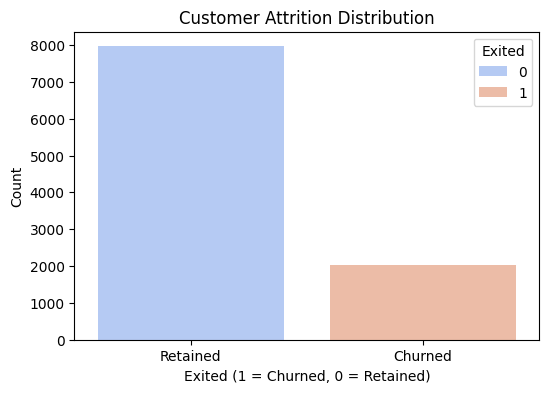

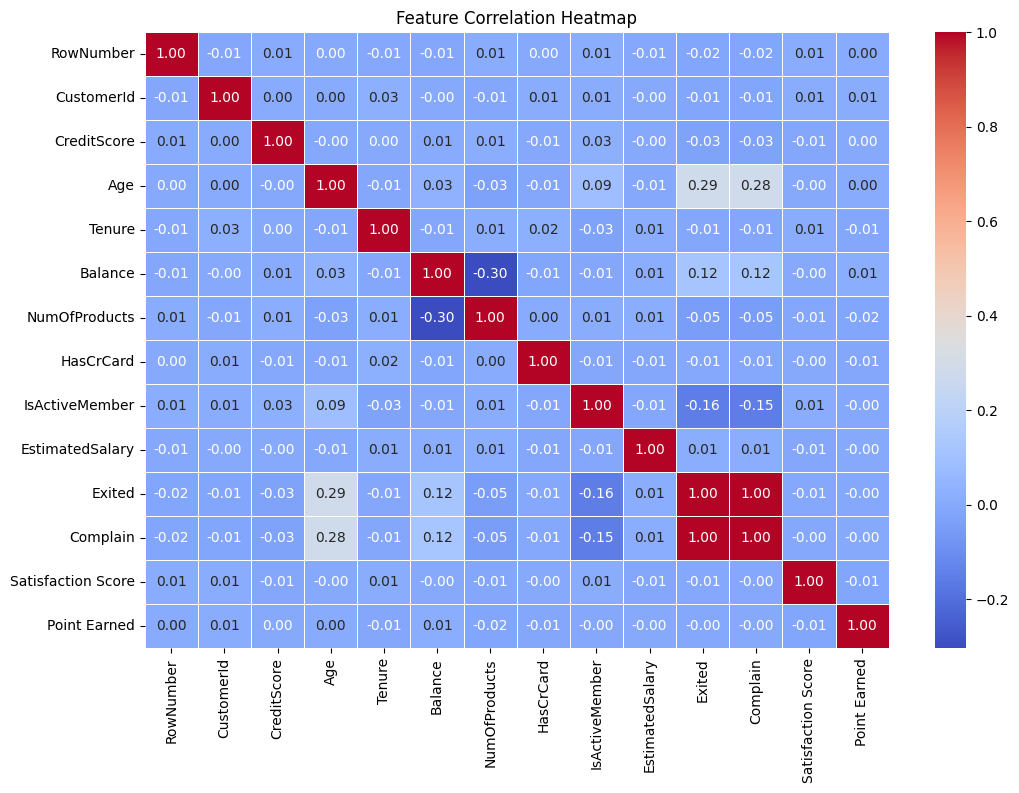

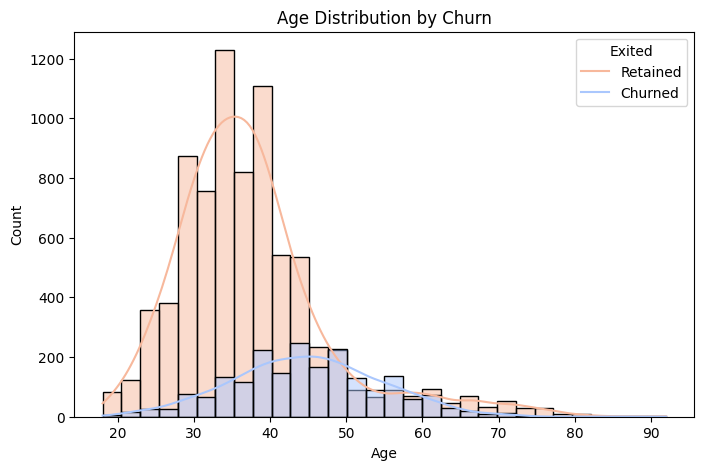

<ipython-input-3-9e45c6239716>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"], y=df["Balance"], palette="coolwarm")


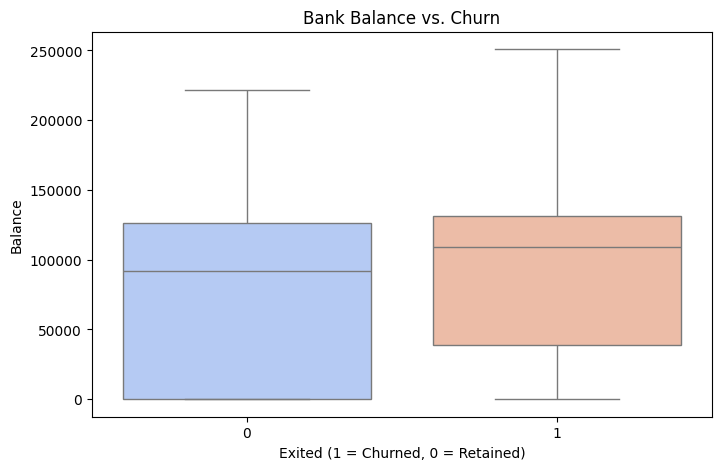

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("/content/cleaned_dataset.csv")


# Churn distribution count plot
plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=df, hue="Exited", palette="coolwarm")  # Explicitly assign 'hue'
plt.title("Customer Attrition Distribution")
plt.xlabel("Exited (1 = Churned, 0 = Retained)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Retained", "Churned"])
plt.legend(title="Exited")  # Ensure legend appears
plt.show()

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", bins=30, kde=True, hue=df["Exited"].astype(str), palette="coolwarm")
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["Retained", "Churned"])
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Exited"], y=df["Balance"], palette="coolwarm")
plt.title("Bank Balance vs. Churn")
plt.xlabel("Exited (1 = Churned, 0 = Retained)")
plt.ylabel("Balance")
plt.show()

In [4]:
df_processed = df.copy()

In [5]:
# Drop Unnecessary and Redundant Columns
df_processed = df_processed.drop(columns=['RowNumber', 'CustomerId','Complain'])

#Display Changes
df_processed.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [6]:
# Label Encoding Appropriate Columns

# Encoding Experience Level Column
gender_mapping = {'Male': 0, 'Female': 1}
df_processed['Gender'] = df_processed['Gender'].map(gender_mapping)

# Encoding Company Size Column
card_type_mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND':3}
df_processed['Card Type'] = df_processed['Card Type'].map(card_type_mapping)

#Display Changes
df_processed.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,Fields,619,France,1,42,2,0.00,1,1,1,101348.88,1,2,3,464
1,Johnston,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,3,3,456
2,Vasilyev,502,France,1,42,8,159660.80,3,1,0,113931.57,1,3,3,377
3,Hooper,699,France,1,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,Colombo,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [7]:
# Frequency Encoding Appropriate Columns

# Encoding Job Title Column
df_processed['Surname'] = df_processed['Surname'].map(df_processed['Surname'].value_counts())

# Encoding Employee Residence Column
df_processed['Geography'] = df_processed['Geography'].map(df_processed['Geography'].value_counts())

# Display Changes
df_processed.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,2,619,5014,1,42,2,0.00,1,1,1,101348.88,1,2,3,464
1,17,608,2477,1,41,1,83807.86,1,0,1,112542.58,0,3,3,456
2,4,502,5014,1,42,8,159660.80,3,1,0,113931.57,1,3,3,377
3,3,699,5014,1,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,8,850,2477,1,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [8]:
# Standardize Necessary Columns
columns_to_standardize = ['Surname', 'CreditScore', 'Geography', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary','Balance','Satisfaction Score', 'Card Type', 'Point Earned']
scaler = StandardScaler()
df_processed[columns_to_standardize] = scaler.fit_transform(df_processed[columns_to_standardize])

# Display Chnages
df_processed.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,-0.998378,-0.326221,0.997164,1,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,-0.721130,1.340157,-0.630839
1,1.150150,-0.440036,-1.015539,1,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,-0.009816,1.340157,-0.666251
2,-0.711907,-1.536794,0.997164,1,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,-0.009816,1.340157,-1.015942
3,-0.855142,0.501521,0.997164,1,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1.412812,-0.448269,-1.135457
4,-0.138967,2.063884,-1.015539,1,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1.412812,-0.448269,-0.803472


In [9]:
# Convert boolean columns to integers
df_processed = df_processed.applymap(lambda x: int(x) if isinstance(x, bool) else x)

X = df_processed.drop('Exited', axis=1).values
y = df_processed['Exited'].values

#train and test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<ipython-input-9-d41e233b1dc5>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_processed = df_processed.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [10]:
# Logistic Regression Model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, verbose=True):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.verbose = verbose

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(1, self.iterations + 1):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.verbose and i % 100 == 0:
                loss = self.compute_loss(y, y_predicted)
                print(f"Iteration {i}/{self.iterations} - Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted > 0.5, 1, 0)

    def predict_single(self, x_single):
        x_single = np.array(x_single).reshape(1, -1)
        logits = np.dot(x_single, self.weights) + self.bias
        probs = self.sigmoid(logits)
        return np.argmax(probs), probs.flatten()

In [11]:
# Training the model
model = LogisticRegression(learning_rate=0.02, iterations=10000)
model.fit(X_train, y_train)

# Predictions and accuracy
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100

# Display final accuracy
print(f"Final Accuracy: {accuracy:.2f}%")


Iteration 100/10000 - Loss: 0.5152
Iteration 200/10000 - Loss: 0.4763
Iteration 300/10000 - Loss: 0.4623
Iteration 400/10000 - Loss: 0.4554
Iteration 500/10000 - Loss: 0.4512
Iteration 600/10000 - Loss: 0.4484
Iteration 700/10000 - Loss: 0.4464
Iteration 800/10000 - Loss: 0.4448
Iteration 900/10000 - Loss: 0.4436
Iteration 1000/10000 - Loss: 0.4425
Iteration 1100/10000 - Loss: 0.4416
Iteration 1200/10000 - Loss: 0.4409
Iteration 1300/10000 - Loss: 0.4402
Iteration 1400/10000 - Loss: 0.4396
Iteration 1500/10000 - Loss: 0.4391
Iteration 1600/10000 - Loss: 0.4387
Iteration 1700/10000 - Loss: 0.4383
Iteration 1800/10000 - Loss: 0.4379
Iteration 1900/10000 - Loss: 0.4376
Iteration 2000/10000 - Loss: 0.4373
Iteration 2100/10000 - Loss: 0.4371
Iteration 2200/10000 - Loss: 0.4369
Iteration 2300/10000 - Loss: 0.4367
Iteration 2400/10000 - Loss: 0.4365
Iteration 2500/10000 - Loss: 0.4364
Iteration 2600/10000 - Loss: 0.4362
Iteration 2700/10000 - Loss: 0.4361
Iteration 2800/10000 - Loss: 0.4360
I

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

# Choose the number of top features (adjust k based on dataset size)
k = 10  # You can change this value after testing

# Apply SelectKBest to extract top k features
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# -------------------------------------------
# Random Forest Classifier with Selected Features
# -------------------------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)

print("\nRandom Forest Performance after Feature Selection:\n", classification_report(y_test, y_pred_rf))

# -------------------------------------------
# K-Nearest Neighbors (KNN) with Selected Features
# -------------------------------------------
knn = KNeighborsClassifier()
knn.fit(X_train_selected, y_train)
y_pred_knn = knn.predict(X_test_selected)

print("\nK-Nearest Neighbors (KNN) Performance after Feature Selection:\n", classification_report(y_test, y_pred_knn))


Random Forest Performance after Feature Selection:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.76      0.49      0.59       408

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


K-Nearest Neighbors (KNN) Performance after Feature Selection:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1592
           1       0.64      0.43      0.51       408

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# -------------------------------------------
# Hyperparameter Tuning for Random Forest
# -------------------------------------------
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, rf_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
rf_search.fit(X_train_selected, y_train)

print("\nBest Random Forest Parameters:", rf_search.best_params_)
y_pred_rf = rf_search.best_estimator_.predict(X_test_selected)
print("\nRandom Forest Performance after Hyperparameter Tuning:\n", classification_report(y_test, y_pred_rf))

# -------------------------------------------
# Hyperparameter Tuning for KNN
# -------------------------------------------
knn_param_dist = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
knn_search = RandomizedSearchCV(knn, knn_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
knn_search.fit(X_train_selected, y_train)

print("\nBest KNN Parameters:", knn_search.best_params_)
y_pred_knn = knn_search.best_estimator_.predict(X_test_selected)
print("\nK-Nearest Neighbors (KNN) Performance after Hyperparameter Tuning:\n", classification_report(y_test, y_pred_knn))



Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 64}

Random Forest Performance after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.77      0.47      0.58       408

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}

K-Nearest Neighbors (KNN) Performance after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1592
           1       0.70      0.38      0.49       408

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



In [14]:
# -------------------------------------------
# Model Performance Comparison
# -------------------------------------------
rf_accuracy = accuracy_score(y_test, y_pred_rf)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

performance_comparison = {
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [rf_accuracy, knn_accuracy],
    "Precision": [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted'),
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted'),
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
    ]
}

performance_df = pd.DataFrame(performance_comparison)


print("\nFinal Model Comparison:\n", performance_df)


Final Model Comparison:
            Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest     0.863   0.854423   0.863  0.849790
1            KNN     0.841   0.826588   0.841  0.821633


In [15]:
# Compare Accuracy Scores
rf_accuracy = accuracy_score(y_test, y_pred_rf)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
# Select the Best Model
if rf_accuracy > knn_accuracy:
    final_model_name = "Random Forest"
    final_model = rf_search.best_estimator_
    final_features = selector.get_support(indices=True)
    X_train_final, X_test_final = X_train_selected, X_test_selected
    final_accuracy = rf_accuracy
else:
    final_model_name = "K-Nearest Neighbors (KNN)"
    final_model = knn_search.best_estimator_
    final_features = selector.get_support(indices=True)
    X_train_final, X_test_final = X_train_selected, X_test_selected
    final_accuracy = knn_accuracy

print(f"\n Final Selected Model: {final_model_name}")
print(f" Best Model Accuracy: {final_accuracy:.4f}")
print(f" Best Features Used: {final_features.tolist()}")

# Retrain the Final Model with Selected Features & Best Hyperparameters
final_model.fit(X_train_final, y_train)

# Make Predictions
y_pred_final = final_model.predict(X_test_final)

# Evaluate Final Model
print(f"\n Final {final_model_name} Performance:")
print(classification_report(y_test, y_pred_final))
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))


 Final Selected Model: Random Forest
 Best Model Accuracy: 0.8630
 Best Features Used: [1, 2, 3, 4, 6, 7, 8, 9, 10, 12]

 Final Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.77      0.47      0.58       408

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Final Accuracy: 0.863
